First 5 records in the dataset:
   videos_watched  assignments_submitted  forum_posts completed
0              11                      6            5       yes
1              43                      1           11        no
2              37                      1            8        no
3              18                      4           14       yes
4               6                      4           15       yes

Model Accuracy: 0.35

Classification Report:
              precision    recall  f1-score   support

          no       0.25      0.43      0.32         7
         yes       0.50      0.31      0.38        13

    accuracy                           0.35        20
   macro avg       0.38      0.37      0.35        20
weighted avg       0.41      0.35      0.36        20

Confusion Matrix:
[[3 4]
 [9 4]]


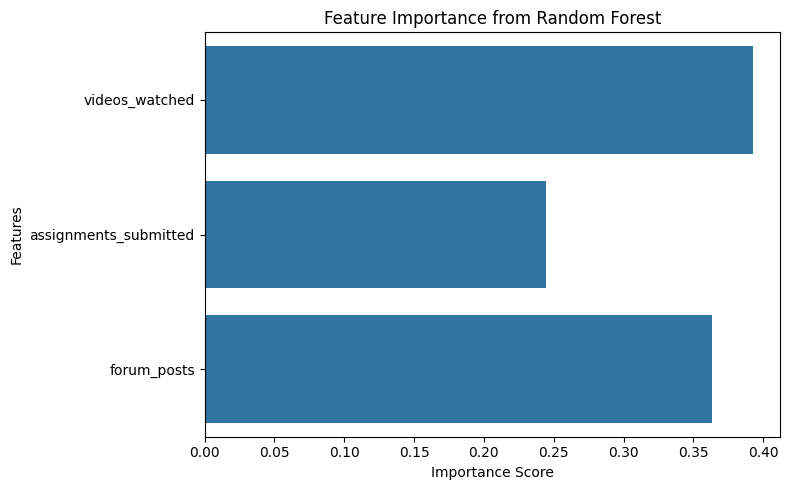

In [8]:
# Import pandas for handling tabular data
import pandas as pd

# Import numpy for numerical operations
import numpy as np

# Import matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn modules for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load the CSV file into a DataFrame
# Make sure the file 'online_learning.csv' is in the same folder as this script
df = pd.read_csv("online_learning.csv")

# Step 2: Display the first 5 records to understand the structure
print("First 5 records in the dataset:")
print(df.head())

# Step 3: Convert the target column 'completed' from 'yes'/'no' to 1/0
df['completed'] = df['completed'].map({'yes': 1, 'no': 0})

# Step 4: Define input features (X) and target variable (y)
X = df[['videos_watched', 'assignments_submitted', 'forum_posts']]  # Features
y = df['completed']  # Target variable

# Step 5: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Create and train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
model.fit(X_train, y_train)  # Train the model using training data

# Step 7: Predict on the test data
y_pred = model.predict(X_test)  # Get predictions (0 or 1)

# Step 8: Convert predictions and actual labels from 0/1 to 'no'/'yes'
y_pred_labels = np.where(y_pred == 1, "yes", "no")
y_test_labels = np.where(y_test == 1, "yes", "no")

# Step 9: Print accuracy of the model
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Step 10: Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

# Step 11: Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))

# Step 12: Visualize the importance of each feature in the prediction
importances = model.feature_importances_  # Get feature importance scores
features = X.columns  # Get feature names

# Plot a bar chart for feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()